# Proyecto Bike Buyer

### Descripcción

AW-Bikes fue fundada en 2009 por Alfred y Wilson Smith necesita generar un algoritmo que ayude a predecir o identificar a los posibles compradores de biciletas

## Librerias

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

## DataSet

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

## Carga del Dataset

In [379]:
os.listdir("Data/")

['data.xlsx']

In [380]:
data_file = Path.cwd().resolve()/"Data"/"data.xlsx"
df_raw = pd.read_excel(data_file)
df_raw.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend,BikeBuyerText
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,M,1,3,0,1,81916,2017-03-06,1,50.97,YES
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,M,1,2,1,2,81076,2017-03-06,1,53.11,YES
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,S,0,3,0,0,86387,2017-03-06,1,54.08,YES
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,M,1,2,1,2,61481,2017-03-06,1,56.93,YES
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,S,1,1,0,0,51804,2017-03-06,1,55.41,YES


Tamaño del dataset

In [381]:
df_raw.shape

(18355, 27)

Descripcción del data set

In [382]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18355 entries, 0 to 18354
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            18355 non-null  int64         
 1   Title                 101 non-null    object        
 2   FirstName             18355 non-null  object        
 3   MiddleName            10570 non-null  object        
 4   LastName              18355 non-null  object        
 5   Suffix                3 non-null      object        
 6   AddressLine1          18355 non-null  object        
 7   AddressLine2          311 non-null    object        
 8   City                  18355 non-null  object        
 9   StateProvinceName     18355 non-null  object        
 10  CountryRegionName     18355 non-null  object        
 11  PostalCode            18355 non-null  object        
 12  PhoneNumber           18355 non-null  object        
 13  BirthDate       

cambiar el nombre de la variable target

In [383]:
df_raw = df_raw.rename(columns={"BikeBuyerText":"Target"})

Cambiar tipo de datos obj a numericos de las demas variables diferentes a la obj

In [384]:
#df_raw. = pd.to_numeric(df_raw., errors="coerce")
#df_raw.head(5)

### Ingenieria de caracteristicas

Se va a dicionar la columna de Edad

In [385]:
date_current = datetime.now()
df_raw["BirthDate"] = pd.to_datetime(df_raw["BirthDate"])
df_raw["Age"] = (date_current - df_raw["BirthDate"]).dt.days
df_raw["Age"] = df_raw["Age"] / 365.25
print(df_raw["Age"].head(5))

0    36.432580
1    51.745380
2    38.442163
3    46.502396
4    49.201916
Name: Age, dtype: float64


## Analisis Exploratorio de los datos

### Manejo de nulos

In [386]:
df_raw.isnull().sum()

CustomerID                  0
Title                   18254
FirstName                   0
MiddleName               7785
LastName                    0
Suffix                  18352
AddressLine1                0
AddressLine2            18044
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
LastUpdated                 0
BikeBuyer                   0
AvgMonthSpend               0
Target                      0
Age                         0
dtype: int64

### Eliminar Datos

#### Eliminar Columnas innecesarias

In [387]:
df_raw.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated', 'BikeBuyer', 'AvgMonthSpend', 'Target',
       'Age'],
      dtype='object')

In [388]:
#Eliminar Columnas innecesarias
columnasdrop = ["Title", "MiddleName", "Suffix", "AddressLine2", "AddressLine1", "LastName", "FirstName", "CustomerID", "City", "StateProvinceName", "PostalCode", "PhoneNumber", "BirthDate", "LastUpdated", "BikeBuyer" ]
df_raw = df_raw.drop(columns=columnasdrop)
df_raw.head(5)

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Target,Age
0,Australia,Bachelors,Clerical,M,M,1,3,0,1,81916,50.97,YES,36.432580
1,Canada,Partial College,Clerical,M,M,1,2,1,2,81076,53.11,YES,51.745380
2,United States,Bachelors,Clerical,F,S,0,3,0,0,86387,54.08,YES,38.442163
3,United Kingdom,Partial College,Skilled Manual,M,M,1,2,1,2,61481,56.93,YES,46.502396
4,Germany,Partial College,Skilled Manual,M,S,1,1,0,0,51804,55.41,YES,49.201916


#### Eliminar Nulos

In [389]:
df_raw.dropna(inplace=True)

### Convertir a numericos la variable objetivo y las demas variables categoricas

In [390]:
df_raw["Target"].unique()

array(['YES', 'NO'], dtype=object)

In [391]:
df_raw["Target"].replace(to_replace="YES", value=1, inplace=True)
df_raw["Target"].replace(to_replace="NO", value=0, inplace=True)
df_raw["Target"].head(5)

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

### Copia el DataSet en el DatSet processing

In [392]:
df_processing = df_raw.copy()

### Cambiar Variables categoricas a numericas

In [393]:
df_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18355 entries, 0 to 18354
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CountryRegionName     18355 non-null  object 
 1   Education             18355 non-null  object 
 2   Occupation            18355 non-null  object 
 3   Gender                18355 non-null  object 
 4   MaritalStatus         18355 non-null  object 
 5   HomeOwnerFlag         18355 non-null  int64  
 6   NumberCarsOwned       18355 non-null  int64  
 7   NumberChildrenAtHome  18355 non-null  int64  
 8   TotalChildren         18355 non-null  int64  
 9   YearlyIncome          18355 non-null  int64  
 10  AvgMonthSpend         18355 non-null  float64
 11  Target                18355 non-null  int64  
 12  Age                   18355 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.8+ MB


### Metodo Dummies

In [394]:
#df_processing=pd.get_dummies(df_processing)
#df_processing.head(5)

### Metodo encoder

In [395]:
#Para cambiar varible multicategorias
label_encoder = LabelEncoder()
for column in df_processing.columns:
    if df_processing[column].dtype == 'object':  # Verificar si la columna es categórica
        df_processing[column + '_encoded'] = label_encoder.fit_transform(df_processing[column])

df_processing.head(5)

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Target,Age,CountryRegionName_encoded,Education_encoded,Occupation_encoded,Gender_encoded,MaritalStatus_encoded
0,Australia,Bachelors,Clerical,M,M,1,3,0,1,81916,50.97,1,36.432580,0,0,0,1,0
1,Canada,Partial College,Clerical,M,M,1,2,1,2,81076,53.11,1,51.745380,1,3,0,1,0
2,United States,Bachelors,Clerical,F,S,0,3,0,0,86387,54.08,1,38.442163,5,0,0,0,1
3,United Kingdom,Partial College,Skilled Manual,M,M,1,2,1,2,61481,56.93,1,46.502396,4,3,4,1,0
4,Germany,Partial College,Skilled Manual,M,S,1,1,0,0,51804,55.41,1,49.201916,3,3,4,1,1


In [396]:
df_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18355 entries, 0 to 18354
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CountryRegionName          18355 non-null  object 
 1   Education                  18355 non-null  object 
 2   Occupation                 18355 non-null  object 
 3   Gender                     18355 non-null  object 
 4   MaritalStatus              18355 non-null  object 
 5   HomeOwnerFlag              18355 non-null  int64  
 6   NumberCarsOwned            18355 non-null  int64  
 7   NumberChildrenAtHome       18355 non-null  int64  
 8   TotalChildren              18355 non-null  int64  
 9   YearlyIncome               18355 non-null  int64  
 10  AvgMonthSpend              18355 non-null  float64
 11  Target                     18355 non-null  int64  
 12  Age                        18355 non-null  float64
 13  CountryRegionName_encoded  18355 non-null  int

In [397]:
df_processing.columns

Index(['CountryRegionName', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome',
       'AvgMonthSpend', 'Target', 'Age', 'CountryRegionName_encoded',
       'Education_encoded', 'Occupation_encoded', 'Gender_encoded',
       'MaritalStatus_encoded'],
      dtype='object')

Eliminar columnas categoricas obj

In [398]:
columnasdrop = ['CountryRegionName', 'Education', 'Occupation', 'Gender','MaritalStatus' ]
df_processing = df_processing.drop(columns=columnasdrop)
df_processing.head(5)

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Target,Age,CountryRegionName_encoded,Education_encoded,Occupation_encoded,Gender_encoded,MaritalStatus_encoded
0,1,3,0,1,81916,50.97,1,36.432580,0,0,0,1,0
1,1,2,1,2,81076,53.11,1,51.745380,1,3,0,1,0
2,0,3,0,0,86387,54.08,1,38.442163,5,0,0,0,1
3,1,2,1,2,61481,56.93,1,46.502396,4,3,4,1,0
4,1,1,0,0,51804,55.41,1,49.201916,3,3,4,1,1


In [399]:
temp_col = df_processing.pop("Target")
position = 0
df_processing.insert(position, "Target", temp_col)

In [400]:
df_processing.head(5)

,Target,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Age,CountryRegionName_encoded,Education_encoded,Occupation_encoded,Gender_encoded,MaritalStatus_encoded
0,1,1,3,0,1,81916,50.97,36.432580,0,0,0,1,0
1,1,1,2,1,2,81076,53.11,51.745380,1,3,0,1,0
2,1,0,3,0,0,86387,54.08,38.442163,5,0,0,0,1
3,1,1,2,1,2,61481,56.93,46.502396,4,3,4,1,0
4,1,1,1,0,0,51804,55.41,49.201916,3,3,4,1,1


### Analisis de Correlación

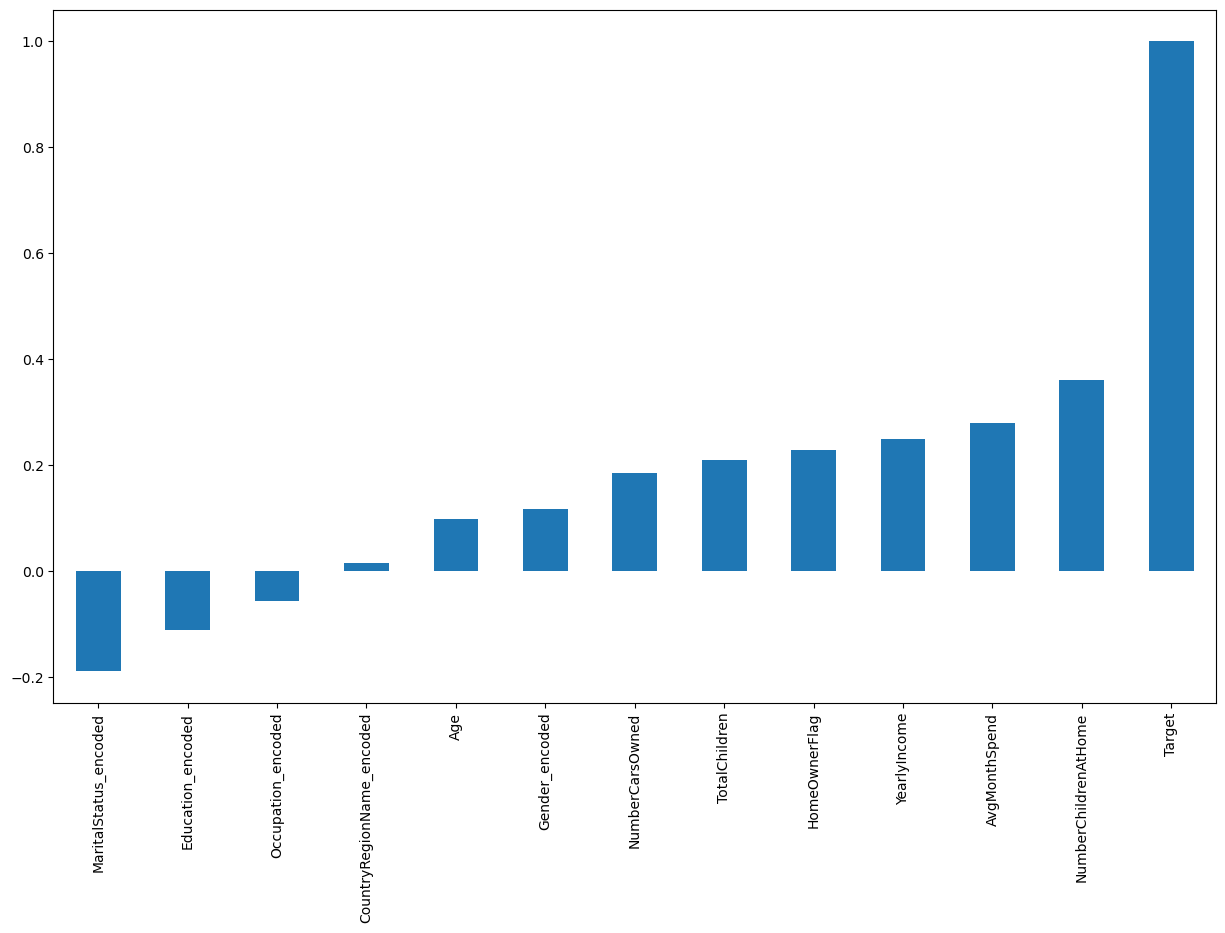

In [401]:
fig0 = plt.figure(figsize=(15,9))
df_processing.corr()["Target"].sort_values(ascending=True).plot(kind="bar")
plt.show()

matrix de correlación

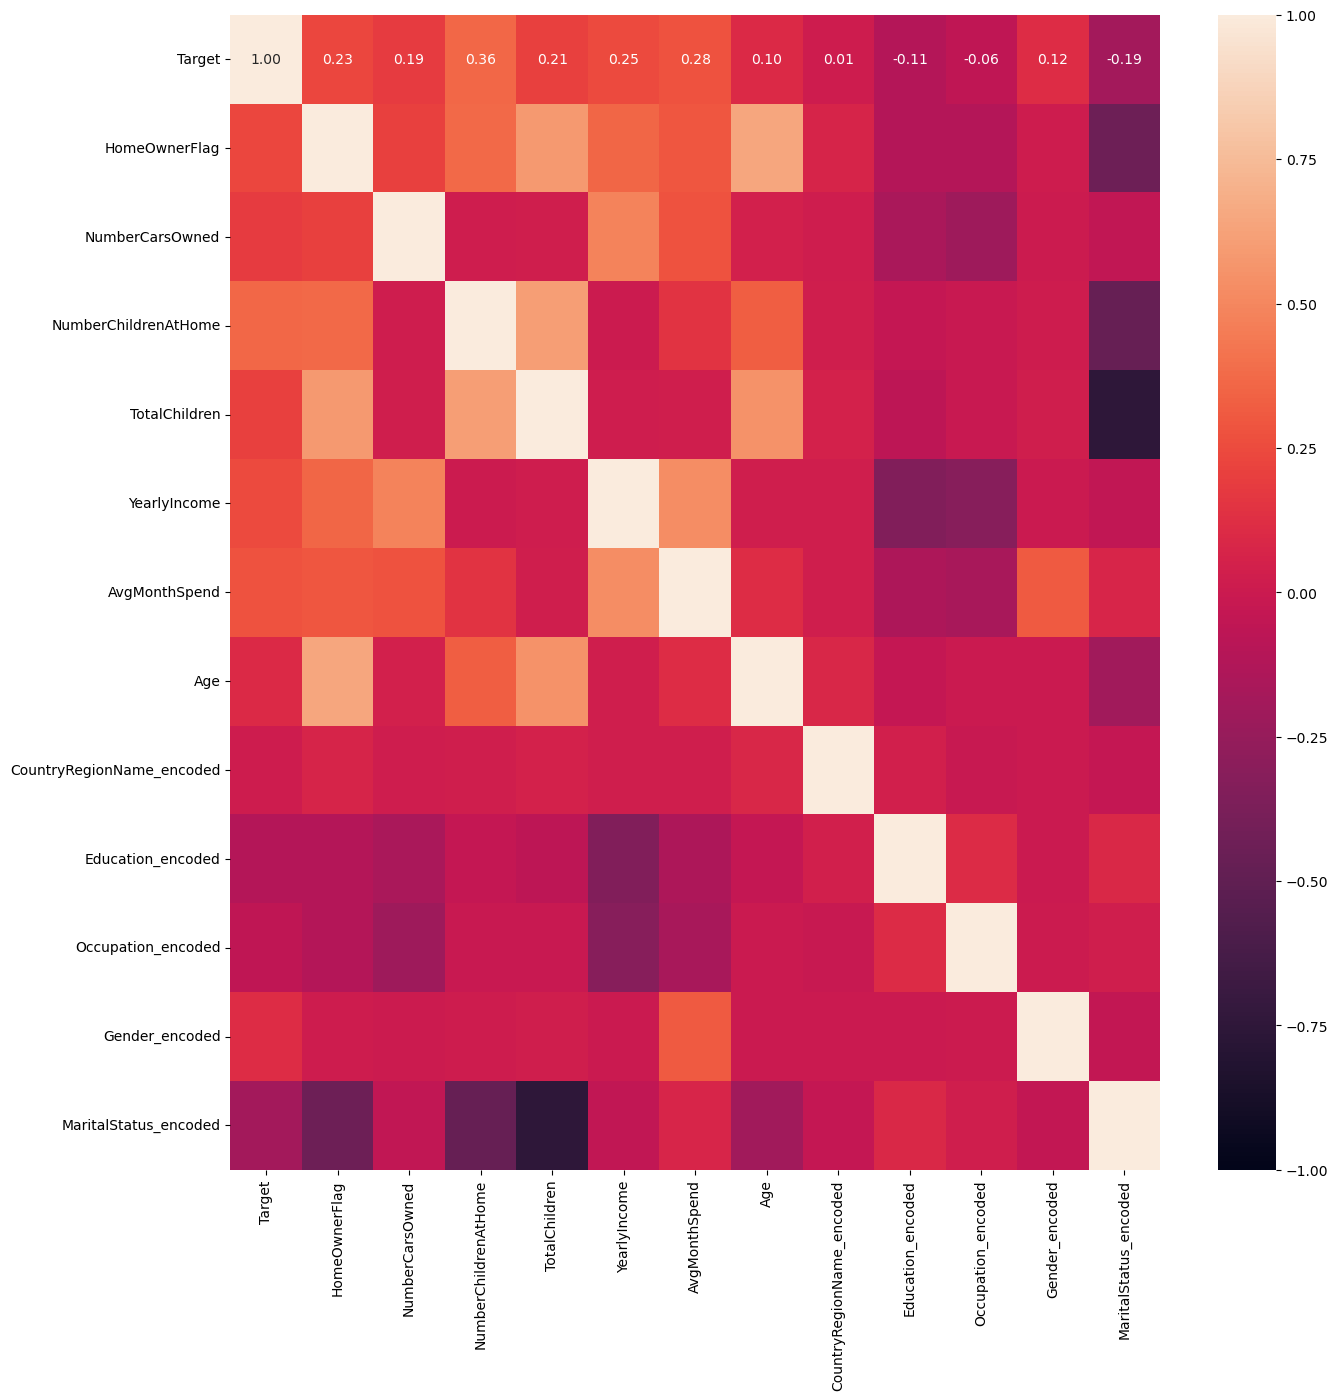

In [402]:
plt.figure(figsize=(15,15))
sns.heatmap(df_processing.corr(),annot=True, vmin=-1, vmax=1, fmt='.2f')
plt.show()

In [403]:
df_processing.corr()

,Target,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Age,CountryRegionName_encoded,Education_encoded,Occupation_encoded,Gender_encoded,MaritalStatus_encoded
Target,1.000000,0.229102,0.185420,0.359822,0.209628,0.249518,0.280320,0.097226,0.014821,-0.111465,-0.056252,0.116172,-0.189319
HomeOwnerFlag,0.229102,1.000000,0.209766,0.368494,0.578198,0.356151,0.290765,0.642706,0.066445,-0.109702,-0.109767,0.010249,-0.442853
NumberCarsOwned,0.185420,0.209766,1.000000,0.020476,0.030165,0.477301,0.275498,0.041757,0.023265,-0.158377,-0.214794,0.003629,-0.051806
NumberChildrenAtHome,0.359822,0.368494,0.020476,1.000000,0.606142,0.005967,0.145095,0.326615,0.031087,-0.038847,-0.013428,0.014678,-0.471487
TotalChildren,0.209628,0.578198,0.030165,0.606142,1.000000,0.021885,0.026108,0.548375,0.053935,-0.067716,-0.011168,0.030502,-0.751021
YearlyIncome,0.249518,0.356151,0.477301,0.005967,0.021885,1.000000,0.530120,0.026308,0.029871,-0.349617,-0.314146,-0.000204,-0.048680
AvgMonthSpend,0.280320,0.290765,0.275498,0.145095,0.026108,0.530120,1.000000,0.111470,0.027543,-0.142780,-0.171469,0.310693,0.070320
Age,0.097226,0.642706,0.041757,0.326615,0.548375,0.026308,0.111470,1.000000,0.078671,-0.032456,-0.002282,-0.002554,-0.198280
CountryRegionName_encoded,0.014821,0.066445,0.023265,0.031087,0.053935,0.029871,0.027543,0.078671,1.000000,0.033118,-0.022275,-0.003263,-0.037730
Education_encoded,-0.111465,-0.109702,-0.158377,-0.038847,-0.067716,-0.349617,-0.142780,-0.032456,0.033118,1.000000,0.105919,-0.000240,0.087638


Eliminar columnas que podrian no estar contribuyendo al analisis 

In [404]:
#df_processing.columns

In [405]:
#df_processing.drop({}, axis=1, inplace=True)
#df_processing.head(5)

In [406]:
#df_processing.shape

In [407]:
#fig1=plt.figure(figsize=(15,15))
#sns.heatmap(df_processing.corr(),annot=True, vmin=-1, vmax=1, fmt='.2f')
#plt.show()

In [408]:
#df_processing.corr()

### Estadistica descriptiva

In [409]:
df_processing.describe()

,Target,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Age,CountryRegionName_encoded,Education_encoded,Occupation_encoded,Gender_encoded,MaritalStatus_encoded
count,18355.00000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000
mean,0.55173,0.610569,1.270390,0.338218,0.850449,72758.950041,51.767207,42.231335,3.099373,1.693054,2.105639,0.505857,0.458186
std,0.49733,0.487634,0.913887,0.569001,0.927363,30687.664358,3.438024,11.253455,1.993188,1.361784,1.588825,0.499979,0.498262
min,0.00000,0.000000,0.000000,0.000000,0.000000,25435.000000,44.100000,23.312799,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,1.000000,0.000000,0.000000,53312.500000,49.410000,33.571526,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.00000,1.000000,1.000000,0.000000,0.000000,61851.000000,51.420000,40.684463,4.000000,2.000000,2.000000,1.000000,0.000000
75%,1.00000,1.000000,2.000000,1.000000,2.000000,87412.000000,53.600000,49.615332,5.000000,3.000000,4.000000,1.000000,1.000000
max,1.00000,1.000000,5.000000,3.000000,3.000000,139115.000000,65.290000,93.683778,5.000000,4.000000,4.000000,1.000000,1.000000


### Visualización de datos

c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 500x500 with 0 Axes>

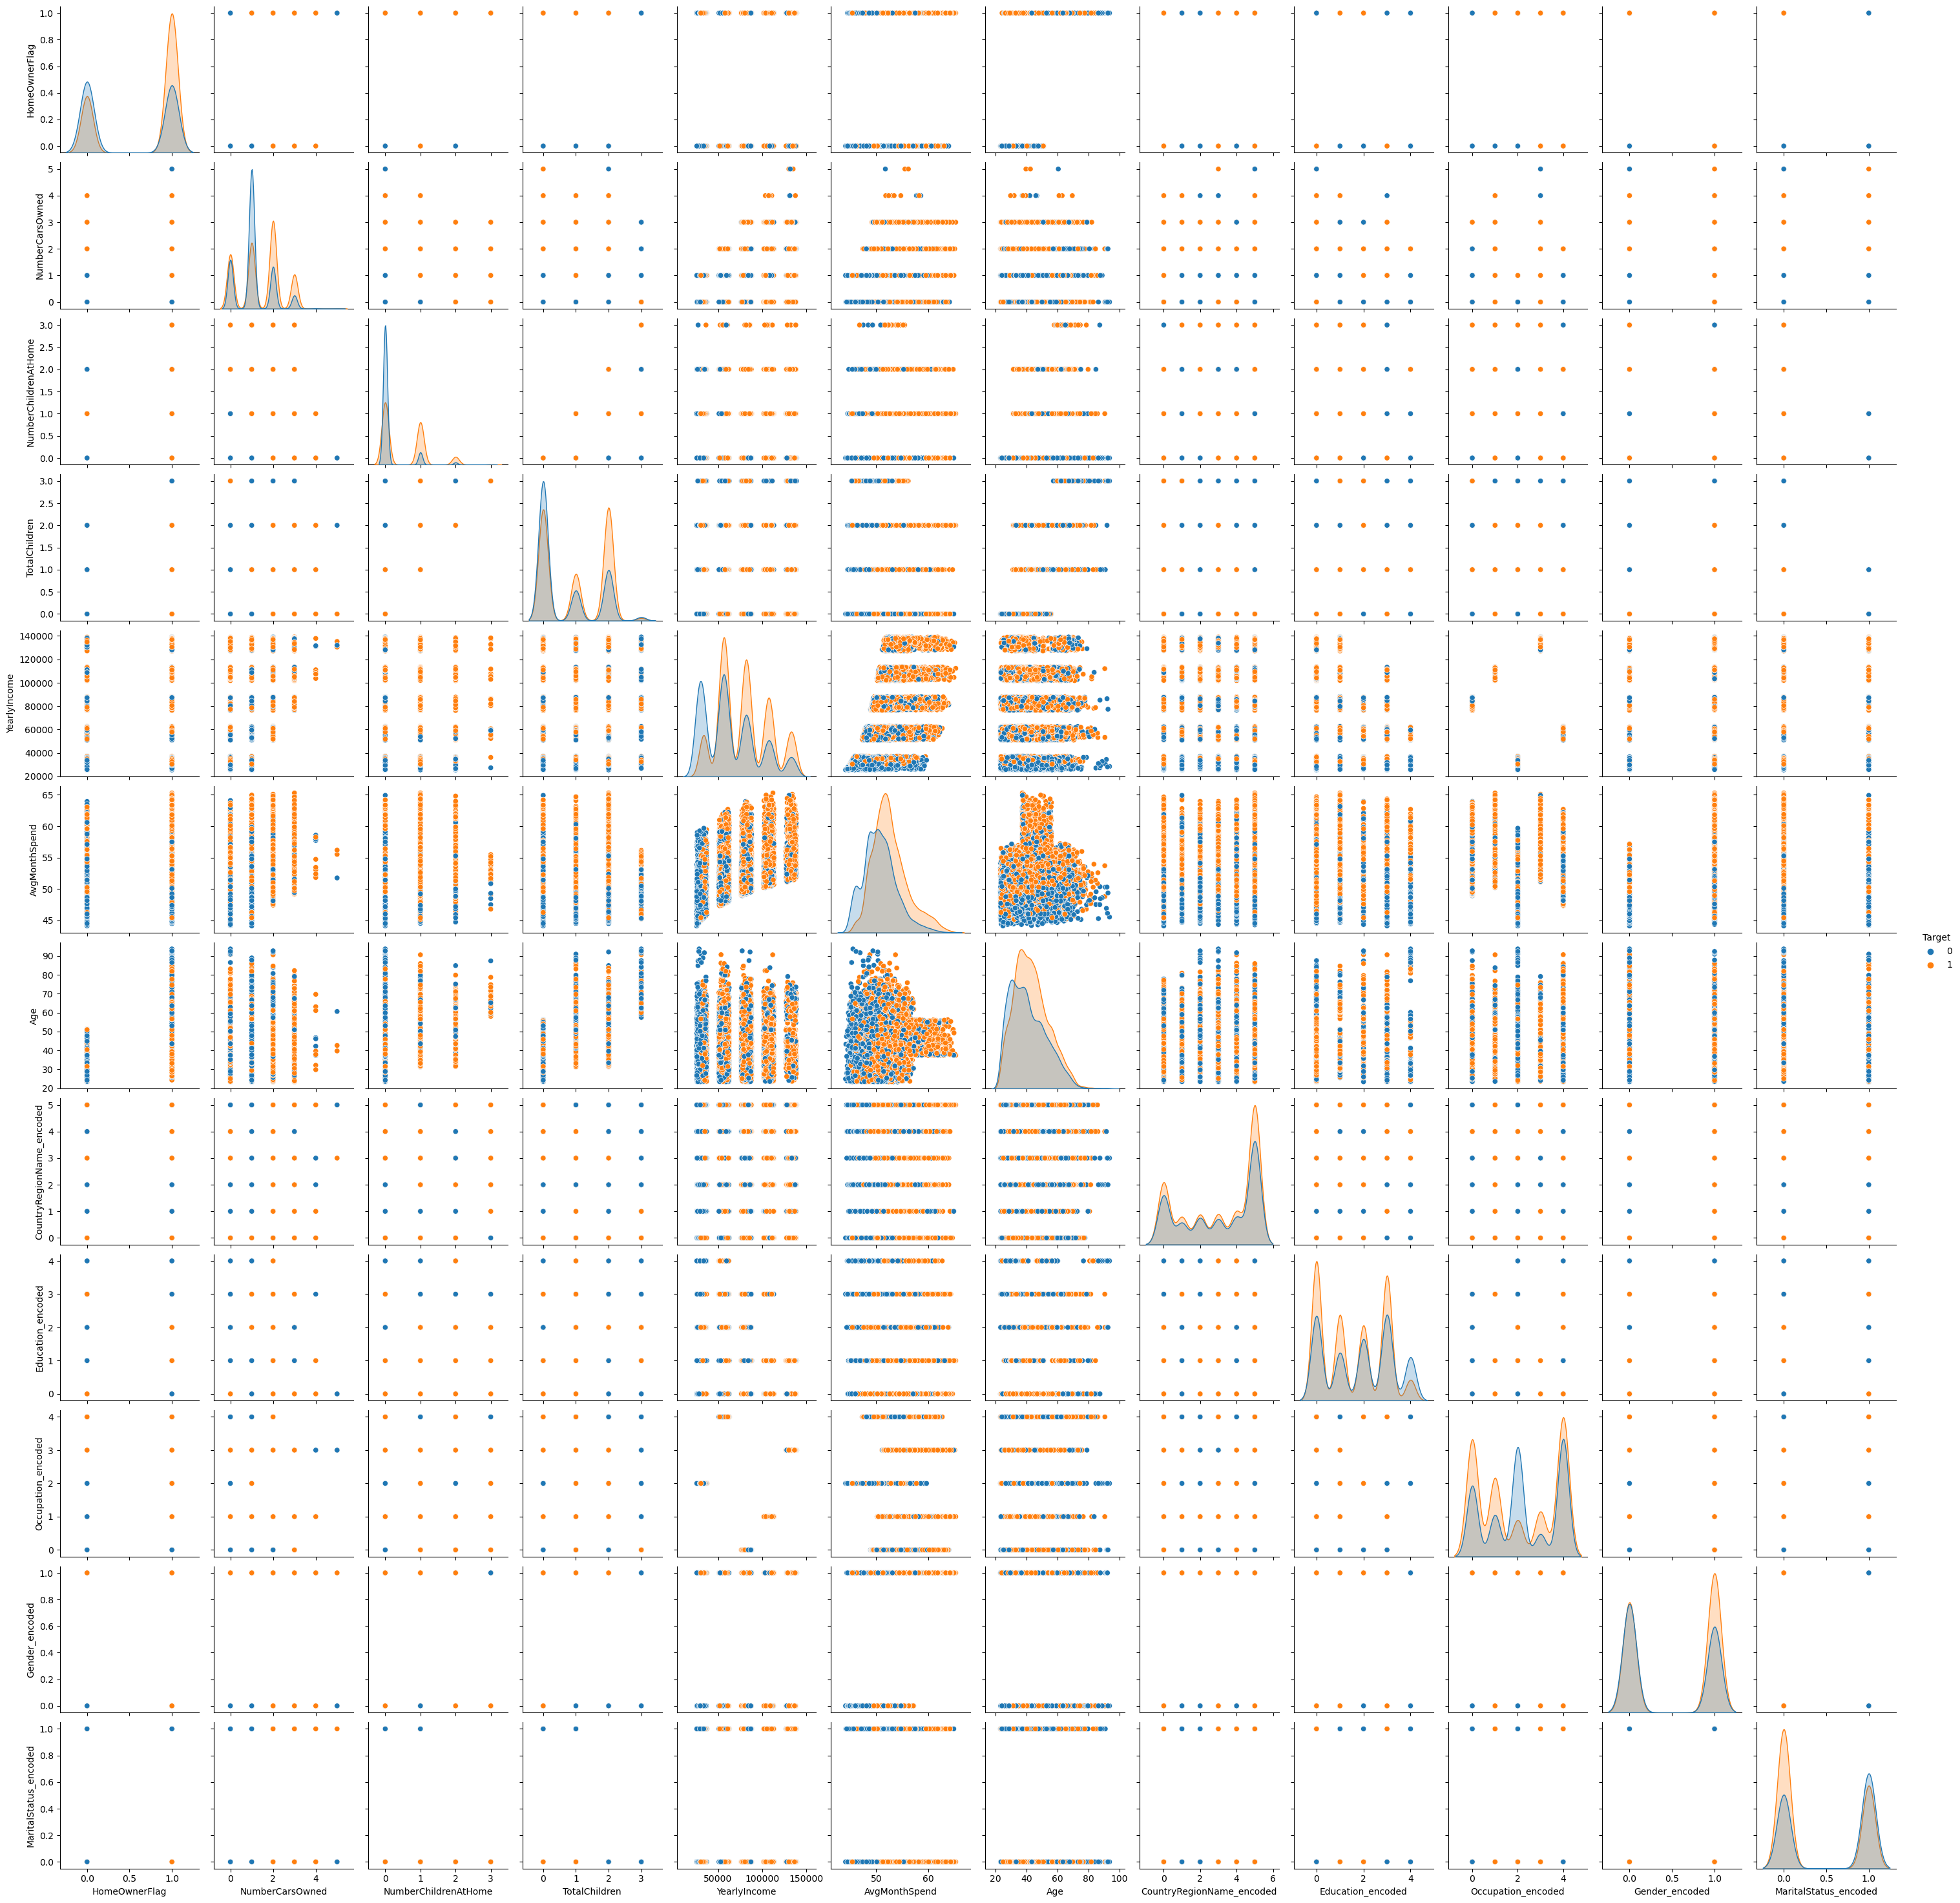

In [410]:
fig2=plt.figure(figsize=(5,5))
sns.pairplot(df_processing, hue="Target")
plt.show()

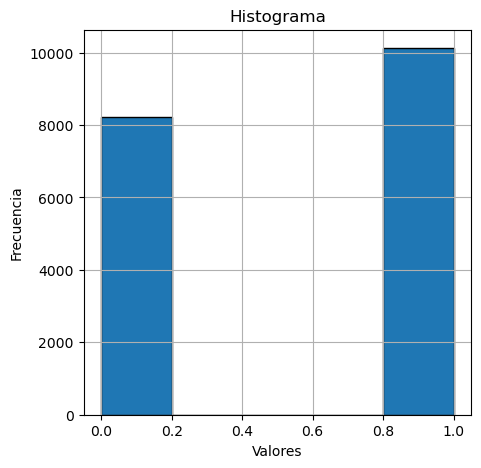

In [411]:
data = df_processing["Target"]
fig3=plt.figure(figsize=(5,5))
plt.hist(data, bins=5, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## Escalabilidad de los datos

In [412]:
scaler = MinMaxScaler()
df_processing_scaler = scaler.fit_transform(df_processing)

In [413]:
df_processing_scaler= pd.DataFrame(df_processing_scaler)
df_processing_scaler.columns= df_processing.columns
df_processing_scaler.head(5)

,Target,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Age,CountryRegionName_encoded,Education_encoded,Occupation_encoded,Gender_encoded,MaritalStatus_encoded
0,1.0,1.0,0.6,0.000000,0.333333,0.496842,0.324210,0.186437,0.0,0.00,0.0,1.0,0.0
1,1.0,1.0,0.4,0.333333,0.666667,0.489453,0.425201,0.404038,0.2,0.75,0.0,1.0,0.0
2,1.0,0.0,0.6,0.000000,0.000000,0.536172,0.470977,0.214994,1.0,0.00,0.0,0.0,1.0
3,1.0,1.0,0.4,0.333333,0.666667,0.317083,0.605474,0.329534,0.8,0.75,1.0,1.0,0.0
4,1.0,1.0,0.2,0.000000,0.000000,0.231958,0.533742,0.367895,0.6,0.75,1.0,1.0,1.0


## Generación de Algoritmo

### Entrenamiento del modelo de regresión logistica

In [414]:
#Sepracion de varible objetivo y las variables independintes
X = df_processing_scaler.drop("Target", axis=1)
y = df_processing_scaler["Target"].values

In [415]:
#Sepracion de datos de entremiento y tes

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=47)

In [416]:
#Generación del modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=2.0, solver='saga', max_iter=100)
scores = cross_val_score(model, X, y, cv=5)

# Mostrar los resultados de la validación cruzada
print("Puntajes de la validación cruzada:", scores)
print("Puntaje medio de validación cruzada:", scores.mean())
result = model.fit(X_train, y_train)

Puntajes de la validación cruzada: [0.69681286 0.69027513 0.70008172 0.70062653 0.69953691]
Puntaje medio de validación cruzada: 0.6974666303459547


In [417]:
#Metricas
from sklearn import metrics
prediction_test = model.predict(X_test)
acc = round((metrics.accuracy_score(y_test, prediction_test)*100),2)
print("La presición del modelo es de ", acc,"%")

La presición del modelo es de  69.03 %


## Analisis de resultados

### Evaluación del modelo

In [418]:
#Nivel de probabilidad de cada uno de los valores
model.predict_proba(X_test)

array([[0.81139226, 0.18860774],
       [0.1988762 , 0.8011238 ],
       [0.63513852, 0.36486148],
       ...,
       [0.31874522, 0.68125478],
       [0.68216111, 0.31783889],
       [0.72091657, 0.27908343]])

In [419]:
probs = (model.predict_proba(X_test))*100
df_probs = pd.DataFrame(probs, columns=['Prob. de no comprar', 'Prob. de ser comprador'])
df_probs = df_probs.round(2)
print(df_probs)

      Prob. de no comprar  Prob. de ser comprador
0                   81.14                   18.86
1                   19.89                   80.11
2                   63.51                   36.49
3                   18.53                   81.47
4                   46.11                   53.89
...                   ...                     ...
3666                30.99                   69.01
3667                78.77                   21.23
3668                31.87                   68.13
3669                68.22                   31.78
3670                72.09                   27.91

[3671 rows x 2 columns]


In [420]:
df_y_test = pd.DataFrame(y_test, columns=["Buyer"])
df_y_test["Buyer"].replace(to_replace=1, value="YES", inplace=True)
df_y_test["Buyer"].replace(to_replace=0, value="NO", inplace=True)
df_y_test["Buyer"].head(5)
df_y_test.head()

,Buyer
0,NO
1,YES
2,NO
3,NO
4,YES


In [421]:
df_predic = pd.DataFrame(prediction_test, columns=["Predicción"])
df_predic["Predicción"].replace(to_replace=1, value="YES", inplace=True)
df_predic["Predicción"].replace(to_replace=0, value="NO", inplace=True)
df_predic.head(5)

,Predicción
0,NO
1,YES
2,NO
3,YES
4,YES


In [422]:
df_test_prob = pd.concat([df_y_test,df_predic, df_probs], axis=1)
df_test_prob.head(5)

,Buyer,Predicción,Prob. de no comprar,Prob. de ser comprador
0,NO,NO,81.14,18.86
1,YES,YES,19.89,80.11
2,NO,NO,63.51,36.49
3,NO,YES,18.53,81.47
4,YES,YES,46.11,53.89


### Exportar datos de python a Exccel

In [423]:
dir = os.getcwd()
dir_excel = os.path.join(dir,"Predicciones.xlsx")
df_test_prob.to_excel(dir_excel, sheet_name="Predicciones")

In [424]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, prediction_test)

# Calcular otras métricas
accuracy = accuracy_score(y_test, prediction_test)
precision = precision_score(y_test, prediction_test)
recall = recall_score(y_test, prediction_test)
f1 = f1_score(y_test, prediction_test)
roc_auc = roc_auc_score(y_test, prediction_test)


### Matrix de Confución

<Figure size 1100x1100 with 0 Axes>

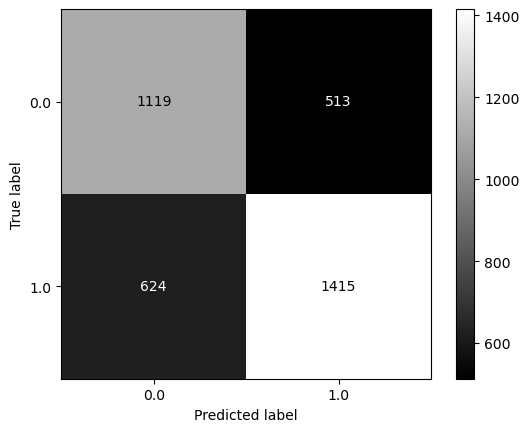

In [425]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="gray")
plt.savefig('matrix.png')
plt.show()

## Ajuste del Modelo

### Coeficientes de las caracteristicas

In [426]:
model.coef_

array([[ 0.10460319,  1.07893213,  5.5801838 , -0.21687545,  1.47036127,
         1.76520203, -0.83404941, -0.01746899, -0.09612468,  0.24895912,
         0.4177763 , -0.13093906]])

In [427]:
model.feature_names_in_

array(['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AvgMonthSpend', 'Age',
       'CountryRegionName_encoded', 'Education_encoded',
       'Occupation_encoded', 'Gender_encoded', 'MaritalStatus_encoded'],
      dtype=object)

Axes(0.125,0.11;0.775x0.77)


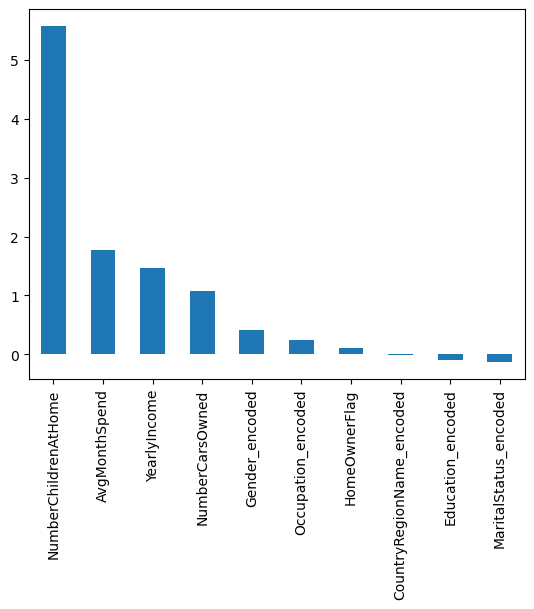

In [428]:
#Que varible tiene mayor incidencia
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind="bar"))

Axes(0.125,0.11;0.775x0.77)


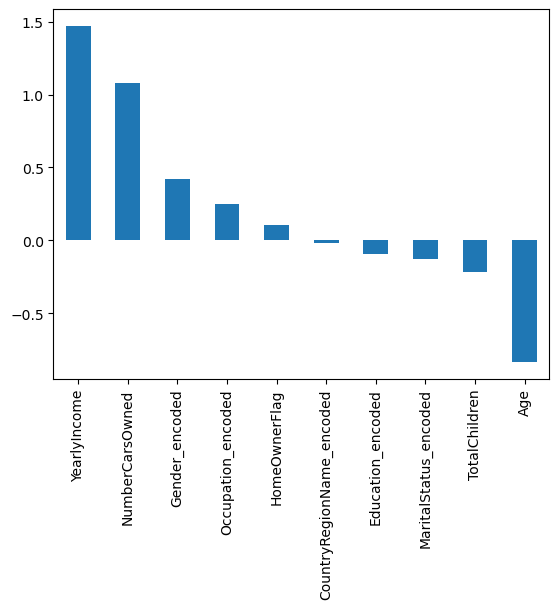

In [429]:
#Que varible tiene menor incidencia
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[-10:].plot(kind="bar"))

### La eliminación recursiva de características

In [430]:
X = df_processing_scaler.drop('Target', axis=1)
y = df_processing_scaler['Target']
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)  # Especifica el número deseado de características a seleccionar
rfe.fit(X, y)
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)

In [431]:
# Mostrar el ranking de características (las características seleccionadas tendrán un ranking de 1)
print("Ranking de características:")
print(feature_ranking)



Ranking de características:
HomeOwnerFlag                7
NumberCarsOwned              1
NumberChildrenAtHome         1
TotalChildren                4
YearlyIncome                 1
AvgMonthSpend                1
Age                          1
CountryRegionName_encoded    8
Education_encoded            6
Occupation_encoded           3
Gender_encoded               2
MaritalStatus_encoded        5
dtype: int32


In [432]:
selected_features = X.columns[rfe.support_]
print("\nCaracterísticas seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['NumberCarsOwned', 'NumberChildrenAtHome', 'YearlyIncome',
       'AvgMonthSpend', 'Age'],
      dtype='object')


In [434]:
df_processing_scaler.columns

Index(['Target', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AvgMonthSpend', 'Age',
       'CountryRegionName_encoded', 'Education_encoded', 'Occupation_encoded',
       'Gender_encoded', 'MaritalStatus_encoded'],
      dtype='object')

In [435]:
#Eliminar Columnas  que no estan aportando
columnasdrop = ['HomeOwnerFlag','TotalChildren','CountryRegionName_encoded', 'Education_encoded', 'Occupation_encoded','Gender_encoded', 'MaritalStatus_encoded']
df_processing_scaler= df_processing_scaler.drop(columns=columnasdrop)
df_processing_scaler.head(5)

,Target,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend,Age
0,1.0,0.6,0.000000,0.496842,0.324210,0.186437
1,1.0,0.4,0.333333,0.489453,0.425201,0.404038
2,1.0,0.6,0.000000,0.536172,0.470977,0.214994
3,1.0,0.4,0.333333,0.317083,0.605474,0.329534
4,1.0,0.2,0.000000,0.231958,0.533742,0.367895


### Generacion de un nuevo algoritmo

In [436]:
#Sepracion de varible objetivo y las variables independintes
X = df_processing_scaler.drop("Target", axis=1)
y = df_processing_scaler["Target"].values

In [437]:
#Sepracion de datos de entremiento y tes
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=47)

In [440]:
#Generación del modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=5)

# Mostrar los resultados de la validación cruzada
print("Puntajes de la validación cruzada:", scores)
print("Puntaje medio de validación cruzada:", scores.mean())
result = model.fit(X_train, y_train)

Puntajes de la validación cruzada: [0.6886407  0.68264778 0.68836829 0.6989921  0.69163716]
Puntaje medio de validación cruzada: 0.6900572051212204


In [442]:
#Metricas
from sklearn import metrics
prediction_test = model.predict(X_test)
acc = round((metrics.accuracy_score(y_test, prediction_test)*100),2)
print("La presición del modelo ajustado ", acc,"%")

La presición del modelo ajustado  68.78 %
